In [10]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [11]:
ebay_df = pd.read_csv('auction.csv')

## Average number of bids

In [12]:
ebay_df = ebay_df.dropna()
ebay_df = ebay_df.groupby('auctionid').size().reset_index(name='count')

In [13]:
average = ebay_df['count'].mean()

In [14]:
ebay_df

,auctionid,count
0,1638843936,7
1,1638844284,2
2,1638844464,16
3,1638844729,11
4,1638893549,5
...,...,...
622,8215558653,14
623,8215571039,20
624,8215582227,16
625,8215605488,11


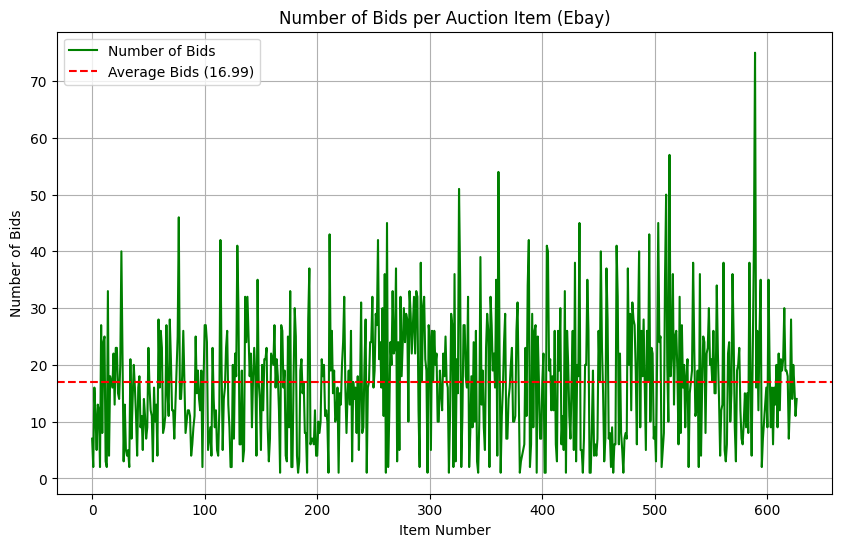

In [15]:
# Plotting the data
fig, axs = plt.subplots(1, 1, figsize=(10, 6))

# Plot the number of bids per item
axs.plot(range(len(ebay_df)), ebay_df['count'], color="green", label='Number of Bids')
# Calculate the average number of bids
average_bids = ebay_df['count'].mean()

# Plot the average number of bids
axs.axhline(y=average_bids, color='red', linestyle='dashed', label=f'Average Bids ({average_bids:.2f})')

# Adding labels and title
axs.set_xlabel('Item Number')
axs.set_ylabel('Number of Bids')
axs.set_title('Number of Bids per Auction Item (Ebay)')

# Adding grid
axs.grid(True)

# Adding legend
axs.legend()

# Display the plot
plt.show()

In [16]:
ebay_df


,auctionid,count
0,1638843936,7
1,1638844284,2
2,1638844464,16
3,1638844729,11
4,1638893549,5
...,...,...
622,8215558653,14
623,8215571039,20
624,8215582227,16
625,8215605488,11


In [17]:
# Export the dataframe to a csv file
ebay_df.to_csv('auction_bids.csv', index=False)

## Comparing number of bids to remaining time

In [18]:
# Reload the original dataframe
ebay_df = pd.read_csv('auction.csv')

# Drop missing values
ebay_df = ebay_df.dropna()

# Show counts by groupby
counts_df = ebay_df.groupby('auction_type').size().reset_index(name='count')
counts_df

,auction_type,count
0,3 day auction,2019
1,5 day auction,1617
2,7 day auction,7018


In [19]:
auctions_3_days = ebay_df.where(ebay_df['auction_type'].str.contains("3 day auction"))
auctions_5_days = ebay_df.where(ebay_df['auction_type'].str.contains("5 day auction"))
auctions_7_days = ebay_df.where(ebay_df['auction_type'].str.contains("7 day auction"))

In [20]:
auctions_3_days = auctions_3_days.dropna()

In [21]:
auctions_3_days_len = len(auctions_3_days)
auctions_3_days

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type
0,1.638894e+09,175.00,2.230949,schadenfreud,0.0,99.0,177.50,Cartier wristwatch,3 day auction
1,1.638894e+09,100.00,2.600116,chuik,0.0,99.0,177.50,Cartier wristwatch,3 day auction
2,1.638894e+09,120.00,2.600810,kiwisstuff,2.0,99.0,177.50,Cartier wristwatch,3 day auction
3,1.638894e+09,150.00,2.601076,kiwisstuff,2.0,99.0,177.50,Cartier wristwatch,3 day auction
4,1.638894e+09,177.50,2.909826,eli.flint@flightsafety.co,4.0,99.0,177.50,Cartier wristwatch,3 day auction
...,...,...,...,...,...,...,...,...,...
8422,8.215611e+09,31.00,2.385764,misschicfashion,13.0,5.0,35.09,Xbox game console,3 day auction
8423,8.215611e+09,32.01,2.385926,misschicfashion,13.0,5.0,35.09,Xbox game console,3 day auction
8424,8.215611e+09,32.00,2.592141,minipc1,104.0,5.0,35.09,Xbox game console,3 day auction
8425,8.215611e+09,35.09,2.973264,bebawl,114.0,5.0,35.09,Xbox game console,3 day auction


In [22]:
auctions_5_days = auctions_5_days.dropna()

In [23]:
auctions_5_days_len = len(auctions_5_days)
auctions_5_days

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type
250,1.639826e+09,1000.0,2.090127,talwang,172.0,899.99,2025.0,Cartier wristwatch,5 day auction
251,1.639826e+09,926.0,2.355451,traderpy,2.0,899.99,2025.0,Cartier wristwatch,5 day auction
252,1.639826e+09,1150.0,2.760602,vkns,46.0,899.99,2025.0,Cartier wristwatch,5 day auction
253,1.639826e+09,1100.0,3.707789,lennytartamella,0.0,899.99,2025.0,Cartier wristwatch,5 day auction
254,1.639826e+09,1200.0,3.708565,lennytartamella,0.0,899.99,2025.0,Cartier wristwatch,5 day auction
...,...,...,...,...,...,...,...,...,...
8815,8.215188e+09,132.5,3.788009,snowyowlsteve,8.0,99.99,132.5,Xbox game console,5 day auction
8816,8.215188e+09,110.0,4.932778,finaelf,132.0,99.99,132.5,Xbox game console,5 day auction
8817,8.215188e+09,119.0,4.967419,fortuneboxinc,113.0,99.99,132.5,Xbox game console,5 day auction
8818,8.215188e+09,125.0,4.967523,fortuneboxinc,113.0,99.99,132.5,Xbox game console,5 day auction


In [24]:
auctions_7_days_len = len(auctions_7_days)
auctions_7_days = auctions_7_days.dropna()

In [25]:
auctions_3_days.loc[:, 'bidtime'] = auctions_3_days['bidtime'].round(1)
auctions_3_days = auctions_3_days.groupby('bidtime').size().reset_index(name='count')
auctions_5_days.loc[:, 'bidtime'] = auctions_5_days['bidtime'].round(1)
auctions_5_days = auctions_5_days.groupby('bidtime').size().reset_index(name='count')
auctions_7_days.loc[:, 'bidtime'] = auctions_7_days['bidtime'].round(1)
auctions_7_days = auctions_7_days.groupby('bidtime').size().reset_index(name='count')

In [26]:
auctions_3_days

,bidtime,count
0,0.0,22
1,0.1,60
2,0.2,48
3,0.3,37
4,0.4,35
5,0.5,59
6,0.6,39
7,0.7,36
8,0.8,51
9,0.9,47


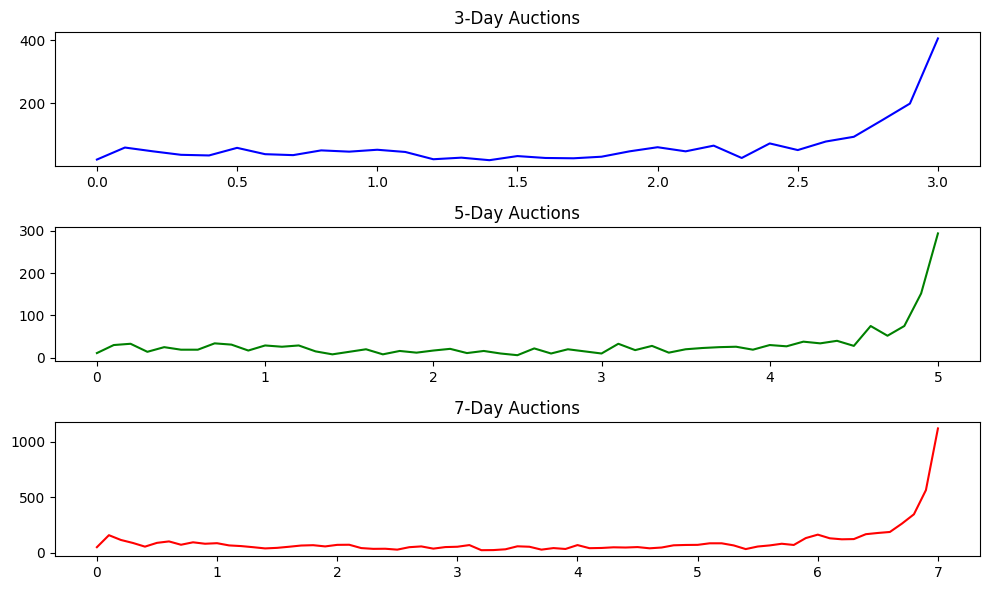

In [27]:
fig, axs = plt.subplots(3, 1, figsize=(10, 6))
axs[0].plot(auctions_3_days['bidtime'], auctions_3_days['count'], color='blue')
axs[0].set_title('3-Day Auctions')

# Plot 5-day auctions
axs[1].plot(auctions_5_days['bidtime'], auctions_5_days['count'], color='green')
axs[1].set_title('5-Day Auctions')

# Plot 7-day auctions
axs[2].plot(auctions_7_days['bidtime'], auctions_7_days['count'], color='red')
axs[2].set_title('7-Day Auctions')

plt.tight_layout()
plt.show()

### Normalization of the data
There are multiple types of auctions and also the dataset contains different amounts of these types. 

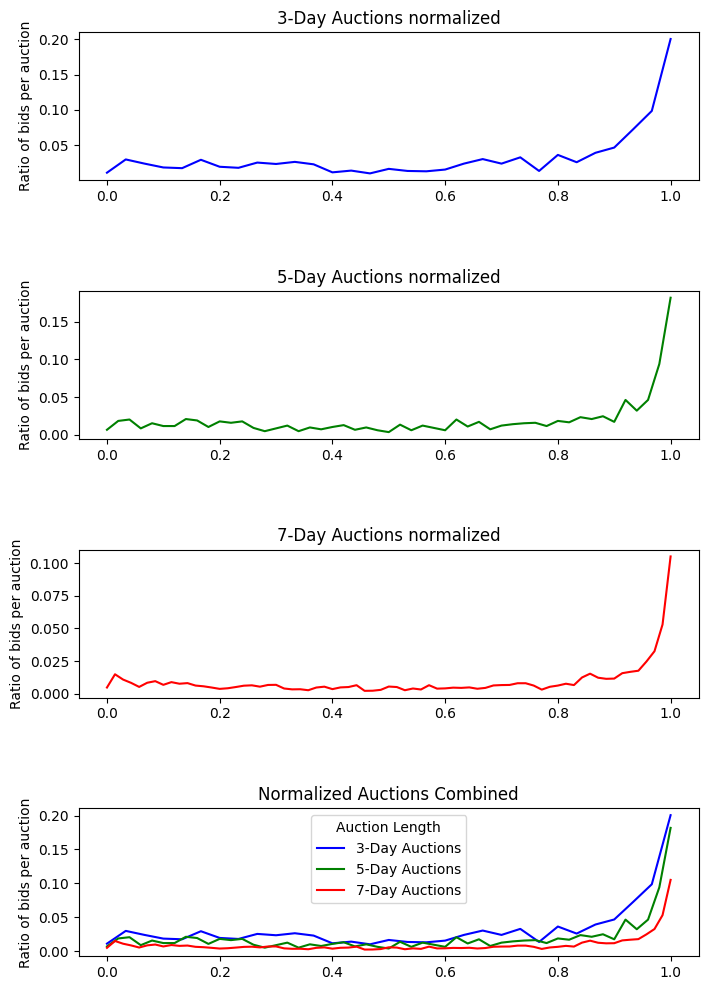

In [28]:
fig, axs = plt.subplots(4, 1, figsize=(8, 12))
plt.subplots_adjust(hspace=0.75)

# Plot 3-day auctions
axs[0].plot(auctions_3_days['bidtime'] / 3.0, auctions_3_days['count'] / auctions_3_days_len, color='blue')
axs[0].set_ylabel('Ratio of bids per auction')
axs[0].set_title('3-Day Auctions normalized')

# Plot 5-day auctions
axs[1].plot(auctions_5_days['bidtime'] / 5.0, auctions_5_days['count'] / auctions_5_days_len, color='green')
axs[1].set_ylabel('Ratio of bids per auction')
axs[1].set_title('5-Day Auctions normalized')

# Plot 7-day auctions
axs[2].plot(auctions_7_days['bidtime'] / 7.0, auctions_7_days['count'] / auctions_7_days_len, color='red')
axs[2].set_ylabel('Ratio of bids per auction')
axs[2].set_title('7-Day Auctions normalized')

# Plot all auctions combined
axs[3].plot(auctions_3_days['bidtime'] / 3.0, auctions_3_days['count'] / auctions_3_days_len, color='blue', label='3-Day Auctions')
axs[3].plot(auctions_5_days['bidtime'] / 5.0, auctions_5_days['count'] / auctions_5_days_len, color='green', label='5-Day Auctions')
axs[3].plot(auctions_7_days['bidtime'] / 7.0, auctions_7_days['count'] / auctions_7_days_len, color='red', label='7-Day Auctions')
axs[3].set_ylabel('Ratio of bids per auction')
axs[3].set_title('Normalized Auctions Combined')
legend = axs[3].legend(loc='upper center', bbox_to_anchor=(0.5, 1))
legend.set_title('Auction Length')

plt.show()
